# Import Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom, poisson, norm, t
from math import comb

## BÀI TẬP

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [147]:
n, p = 10, 0.25

In [148]:
# a
[binom.rvs(n, p) for i in range(10)]

[2, 4, 3, 2, 5, 2, 2, 1, 1, 2]

In [149]:
# b
comb(n, 2) * (p**2) * ((1 - p) ** 4)

0.889892578125

In [150]:
# c
print(f"E(X) = {n*p}")
print(f"Var(X) = {n*p*(1-p)}")

E(X) = 2.5
Var(X) = 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [151]:
poisson.pmf(1, 3)

0.14936120510359183

In [152]:
poisson.pmf(2, 3)

0.22404180765538775

In [153]:
poisson.pmf(3, 3)

0.22404180765538775

**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [154]:
mu = 500
sigma = 4

In [155]:
# a.

z1 = (505 - mu) / sigma
z2 = (495 - mu) / sigma

p1 = 1 - norm.cdf(z1)
p2 = norm.cdf(z1) - norm.cdf(z2)
p3 = norm.cdf(z2)

p1, p2, p3

(0.10564977366685535, 0.7887004526662893, 0.10564977366685535)

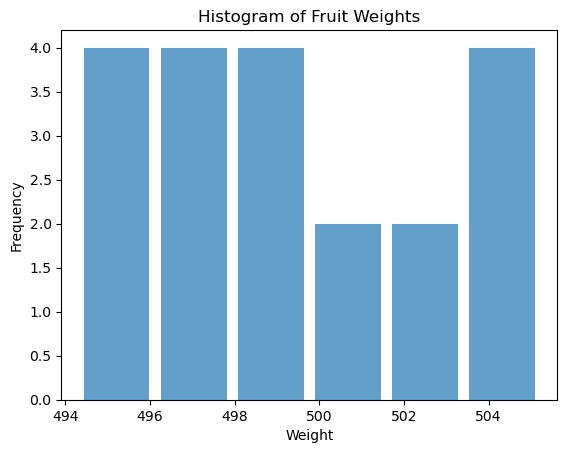

Sample mean: 499.4258047805276
Sample standard deviation: 3.569364613255926


In [156]:
# b.

sample = np.random.normal(mu, sigma, 20)

plt.hist(sample, bins="auto", alpha=0.7, rwidth=0.85)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Fruit Weights")
plt.show()

print(f"Sample mean: {np.mean(sample)}")
print(f"Sample standard deviation: {np.std(sample)}")

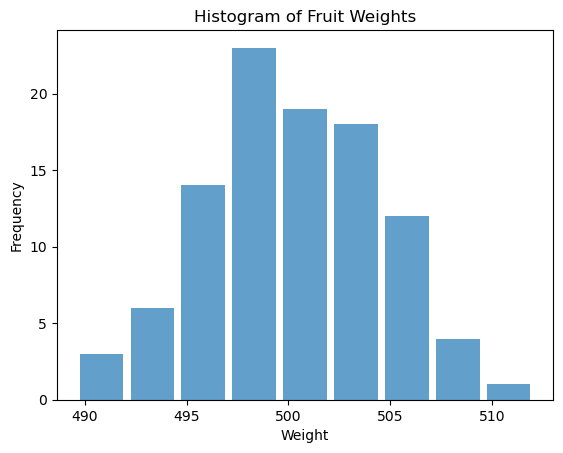

Sample mean: 500.2981988137201
Sample standard deviation: 4.352822051969884


In [157]:
# c.

sample = np.random.normal(mu, sigma, 100)

plt.hist(sample, bins="auto", alpha=0.7, rwidth=0.85)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Fruit Weights")
plt.show()

print(f"Sample mean: {np.mean(sample)}")
print(f"Sample standard deviation: {np.std(sample)}")

d. Kích thước mẫu lớn hơn (100 so với 20) thường dẫn đến ước lượng trung bình mẫu và độ lệch chuẩn mẫu chính xác hơn (tức là gần với giá trị thực của quần thể hơn). Điều này là do hiệu ứng của định luật số lớn. Histogram của mẫu lớn hơn cũng sẽ giống hơn với hình dạng của phân phối chuẩn.

**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [158]:
n = 5000
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n)

In [159]:
# a.
np.sum(rolls == 4) / n

0.1592

In [160]:
# b.
np.sum(rolls >= 4) / n

0.498

In [161]:
# c.
np.sum(rolls[rolls >= 4] == 6) / len(rolls[rolls >= 4])

0.3389558232931727

**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

In [162]:
n = 50
p = 0.7

numbers = np.random.binomial(n, p, 5000)

In [163]:
# a.
min_val = np.min(numbers)
max_val = np.max(numbers)

Q1 = np.percentile(numbers, 25)
Q2 = np.percentile(numbers, 50)
Q3 = np.percentile(numbers, 75)

print(f"Min: {min_val}, Q1: {Q1}, Q2: {Q2}, Q3: {Q3}, Max: {max_val}")

Min: 23, Q1: 33.0, Q2: 35.0, Q3: 37.0, Max: 45


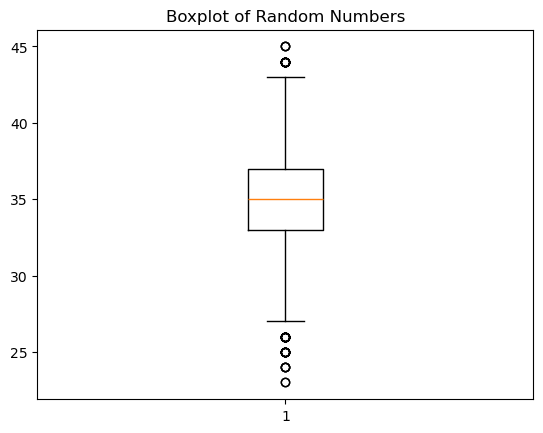

In [164]:
# b.
plt.boxplot(numbers)
plt.title("Boxplot of Random Numbers")
plt.show()

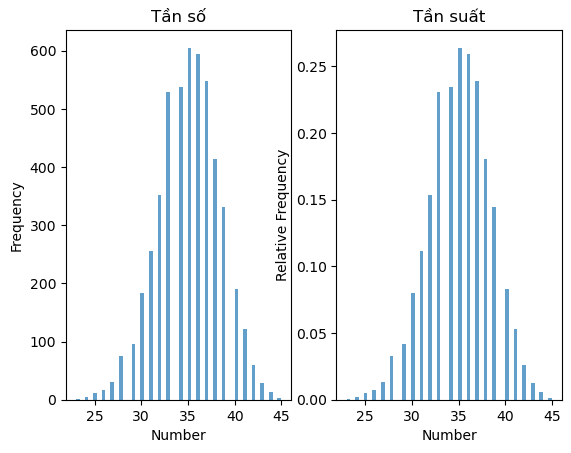

In [165]:
# c.
plt.subplot(1, 2, 1)
plt.hist(numbers, bins="auto", alpha=0.7, rwidth=0.85)
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Tần số")

plt.subplot(1, 2, 2)
plt.hist(numbers, bins="auto", alpha=0.7, rwidth=0.85, density=True)
plt.xlabel("Number")
plt.ylabel("Relative Frequency")
plt.title("Tần suất")

plt.show()